<a href="https://colab.research.google.com/github/Lomesh2000/Stock-Prediction-using-LSTM/blob/Lomesh2000/Stock_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import shutil

os.chdir('/content/drive/MyDrive/Github')
#os.mkdir('Stock prediction')
os.chdir('/content/drive/MyDrive/Github/Stock prediction')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as data


# setting up the period of which we want the stock details


In [ ]:
start='2010-01-01'
end='2022-01-01'


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

## analysing Apple stock i.e. `AAPL`

In [ ]:
 df=data.DataReader('AAPL','yahoo',start,end)

In [ ]:
df.to_csv('APPLE STOCK.csv')

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556001
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482608


In [ ]:
len(df)

3021

In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556001
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482608


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


Text(0.5, 1.0, 'APPLE STOCK---Close')

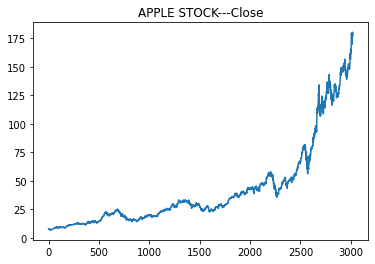

In [ ]:
plt.plot(df['Close'])
plt.title('APPLE STOCK---Close')

# Visualising data of the stock

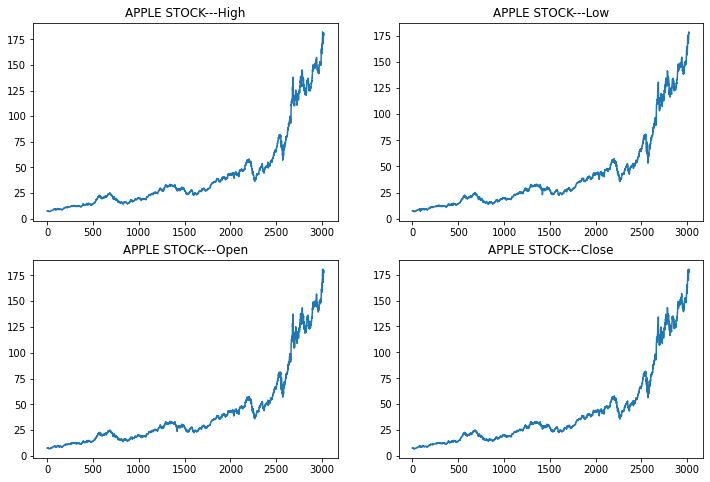

In [ ]:
figure,axis=plt.subplots(2,2,figsize=(12,8))
col=df.columns
counter=0
for i in range(2):
    
    for j in range(2):

        axis[i,j].plot(df[col[counter]])

        axis[i,j].set_title('APPLE STOCK---{col_name}'.format(col_name=col[counter]))

        counter=counter+1


## Considering mean average `ma` value for previous 100 & 200 values for each output

In [ ]:
ma_100=df.Close.rolling(100).mean()

ma_200=df.Close.rolling(200).mean()
#ma_100

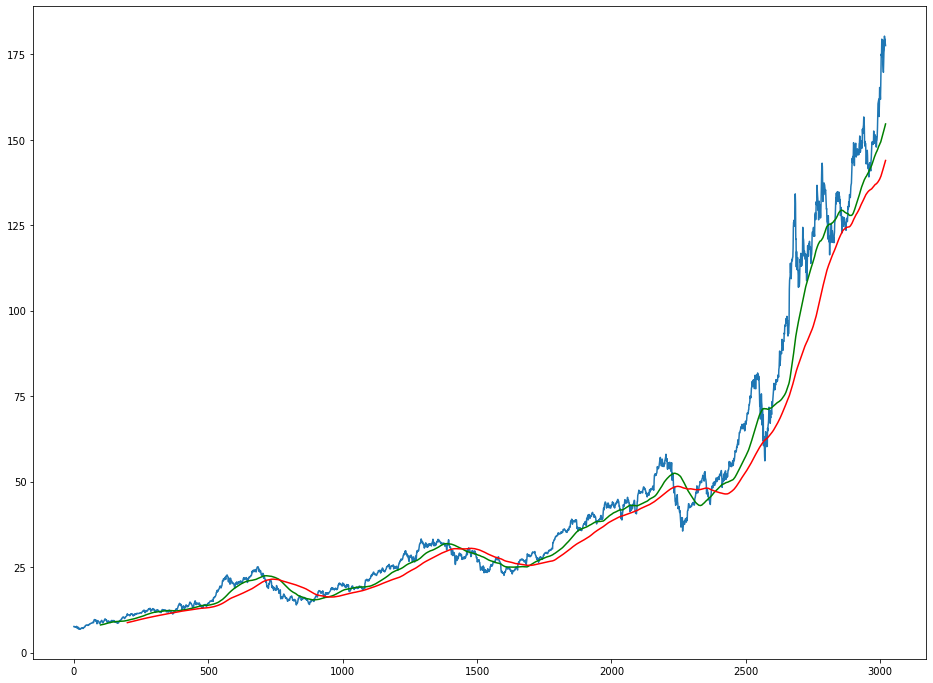

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(df.Close)
plt.plot(ma_100,'g')
plt.plot(ma_200,'r')

# SPlitting `Close` data into `train` and `test` data


In [ ]:
train_data=pd.DataFrame(df['Close'][0:int(len(df['Close'])*0.7)])
test_data=pd.DataFrame(df['Close'][len(train_data)::])

In [ ]:


print(len(df.Close))
print(len(train_data))

3021
2114


In [ ]:
train_data.reset_index()
test_data.reset_index()
train_data.shape,test_data.shape

((2114, 1), (907, 1))

# setting up the scaler for normalising values between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
train_data_array=scaler.fit_transform(train_data)
train_data_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

# Splitting into `x_train` and `y_train`

In [ ]:
x_train=[]
y_train=[]

for i in range(100,len(train_data_array)):
    x_train.append(train_data_array[i-100:i])
    y_train.append(train_data_array[i])




# Converting into Array

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train.shape,y_train.shape

((2014, 100, 1), (2014, 1))

In [ ]:
!pip install tensor-dash

In [ ]:

from tensordash.tensordash import Tensordash
histories=Tensordash(ModelName="Stock Prediction and Analysis")

Enter Email :lomeshsoni70@gmail.com
Enter Tensordash Password :··········


# Making Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Flatten,Dropout

In [ ]:

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

history=model.fit(x_train,y_train,epochs=50,callbacks=[histories])



Epoch 1/50
63/63 [==============================] - 24s 293ms/step - loss: 0.0413
Epoch 2/50
63/63 [==============================] - 18s 293ms/step - loss: 0.0091
Epoch 3/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0073
Epoch 4/50
63/63 [==============================] - 18s 291ms/step - loss: 0.0067
Epoch 5/50
63/63 [==============================] - 18s 293ms/step - loss: 0.0068
Epoch 6/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0063
Epoch 7/50
63/63 [==============================] - 18s 292ms/step - loss: 0.0053
Epoch 8/50
63/63 [==============================] - 19s 294ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0048
Epoch 10/50
63/63 [==============================] - 19s 294ms/step - loss: 0.0050
Epoch 11/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0046
Epoch 12/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0047
Epoch 13/50
6

In [ ]:
model.save('stock and predictin.h5')

In [ ]:
test_data.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


# Getting previous hundred days for the prediction

In [ ]:
previous_100_days=train_data.tail(100)

final_data=previous_100_days.append(test_data,ignore_index=True)

# scaling the data between 0 and 1

In [ ]:
input_data=scaler.fit_transform(final_data)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [ ]:
input_data.shape

(1007, 1)

# creating `x_test` for prediction and `y_test` to compare between predicted and original prices

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

x_test=np.array(x_test)
y_test=np.array(y_test)


x_test.shape,y_test.shape

((907, 100, 1), (907, 1))

# Using our model to predict prices for the future

In [ ]:
y_predicted=model.predict(x_test)

# Scaling up the y_predicted and y_test data for fuuther comparison


In [ ]:
scale_factor=scaler.scale_[0]

y_test=y_test*(1/scale_factor)

y_predicted=y_predicted*(1/scale_factor)

# Plotting y_predicted and y_test graph


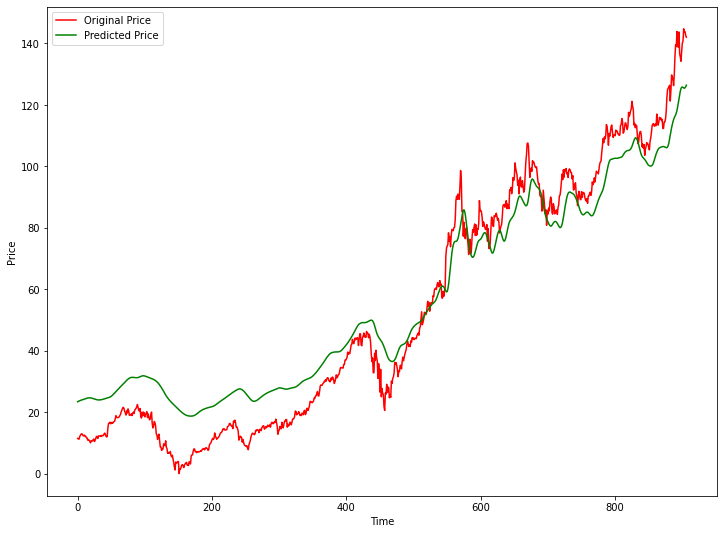

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(y_test,'r',label="Original Price")

plt.plot(y_predicted,'g',label="Predicted Price")

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.savefig('original vs predicted prices.png')


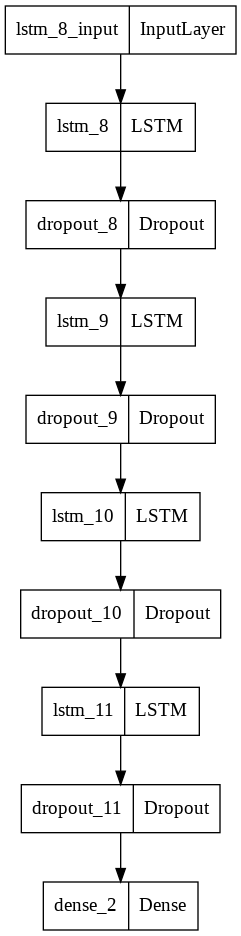

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,'model.png') 